In [45]:
import numpy as np
import math
import os
import re
from time import time

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.patches as patches
import matplotlib.gridspec as gridspec

from PIL import Image




In [3]:
def read_tiff(path, n_images):
    """
    path - Path to the multipage-tiff file
    n_images - Number of pages in the tiff file
    """
 
    img = Image.open(path)
    #images = np.array()
    images = []
    for i in range(n_images):
        try:
            img.seek(i)

            #np.stack(images, np.array(img))
            images.append(np.array(img))

        except EOFError:
            # Not enough frames in img
            break

    return np.array(images)

In [4]:
print(1240*1120*20 / (1000*1000))

27.776


In [73]:
print(225*200*300 / (1000*1000))

13.5


In [6]:
# read multi-tiff

path = 'e:\\Data\\bone_load\\syn13\\'
file_name = 'reg1_center_4d_stack_700_600_500.tif'

max_read_images = 500*10 # all: 2880
    
start = time()
images = read_tiff(path + file_name, max_read_images)
end = time()

print ('Time elapsed: ', (end-start))


Time elapsed:  20.950000047683716


In [67]:
print(images.shape)

(5000, 600, 700)


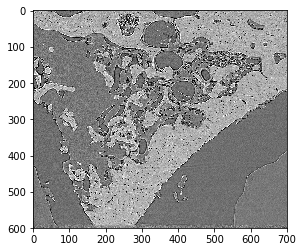

In [7]:
plt.imshow(images[0], cmap='gray')
plt.show()


In [71]:
out_path = 'e:\\Data\\bone_load\\syn13\\vol_slices\\'
out_prefix = 'volslice_'

Blocks: (4, 4, 2)
Block sizes: (175, 150, 250)
Voxels per block (M): 6.5625
Processing time frame: 0
Processing time frame: 1
Processing time frame: 2
Processing time frame: 3
Processing time frame: 4
Processing time frame: 5
Processing time frame: 6
Processing time frame: 7
Processing time frame: 8
Processing time frame: 9


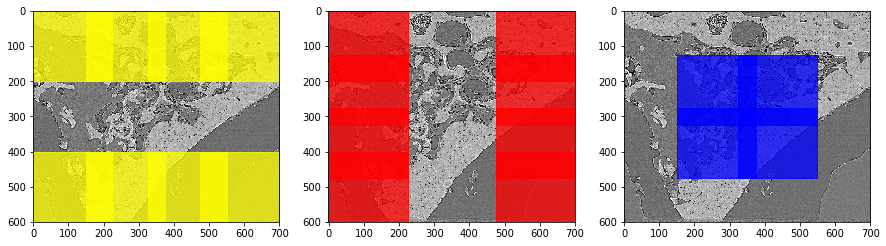

Finished


In [72]:
xdim = 4
ydim = 4
zdim = 2

block_dim = (xdim,ydim,zdim)

ext = 25

n_frames = 10

bx = int(images.shape[2] / block_dim[0])
by = int(images.shape[1] / block_dim[1])
bz = int(images.shape[0] / n_frames / block_dim[2])

size_z = int(images.shape[0] / n_frames)

print('Blocks:', block_dim)
print('Block sizes:', (bx, by, bz))

#ax = plt.subplot(111)


fig = plt.figure(1)
fig.set_size_inches(15, 5, forward=True)
    
gs = gridspec.GridSpec(1, 3)

ax0 = plt.subplot(gs[0,0])
ax0.imshow(images[0], cmap='gray')

ax1 = plt.subplot(gs[0,1])
ax1.imshow(images[0], cmap='gray')

ax2 = plt.subplot(gs[0,2])
ax2.imshow(images[0], cmap='gray')

debug_mode = True

print('Voxels per block (M):', bx*by*bz / (1000*1000))

#for n in range(2):
for n in range(n_frames):

    print('Processing time frame:', n)
    
    for k in range(zdim):    
        for i in range(ydim):
            for j in range(xdim):

                z1 = n*size_z + k*bz-ext*(0 if k==0 else 1 if k<zdim-1 else 2)
                z2 = n*size_z + (k+1)*bz+ext*(0 if k==zdim-1 else 1 if k>0 else 2)

                y1 = i*by-ext*(0 if i==0 else 1 if i<ydim-1 else 2)
                y2 = (i+1)*by+ext*(0 if i==ydim-1 else 1 if i>0 else 2)

                x1 = j*bx-ext*(0 if j==0 else 1 if j<xdim-1 else 2)
                x2 = (j+1)*bx+ext*(0 if j==xdim-1 else 1 if j>0 else 2)

                im = images[z1:z2,y1:y2,x1:x2]

                if debug_mode and n==0: # show only for the first z-frame 
                    if i>0 and i < ydim-1 and j >0 and j < xdim-1: # Inner patches
                        c = 'blue'
                        rect1 = patches.Rectangle((x1, y1),bx+2*ext,by+2*ext,linewidth=1,edgecolor=c,facecolor=c, alpha=0.5)
                        ax2.add_patch(rect1)

                    if j == 0 or j == xdim-1: # Left and right
                        c = 'red' # left and right
                        rect1 = patches.Rectangle((x1, y1),bx+2*ext,by+2*ext,linewidth=1,edgecolor=c,facecolor=c, alpha=0.5)
                        ax1.add_patch(rect1)

                    if i == 0 or i == ydim-1: # Upper and bottom
                        c = 'yellow'
                        rect1 = patches.Rectangle((x1, y1),bx+2*ext,by+2*ext,linewidth=1,edgecolor=c,facecolor=c, alpha=0.5)
                        ax0.add_patch(rect1)

                #im.tofile(out_path + out_prefix + 'ext-{6:d}-index-{0:d}-{1:d}-{2:d}_slice-{3:d}-{4:d}-{5:d}-time{7:02d}.raw'.format(j,i, k, bx+2*ext, by+2*ext, bz+2*ext, ext, n))
                
                #rect1 = patches.Rectangle((x1, y1),bx+2*ext,by+2*ext,linewidth=1,edgecolor=c,facecolor=c, alpha=0.5)
                #ax.add_patch(rect1)

                #plt.imshow(im[0], cmap='gray')
                #plt.show()
plt.show()

print('Finished')


In [74]:
regions = []
for k in range(zdim):    
        for i in range(ydim):
            for j in range(xdim):
                s = '{0:d}-{1:d}-{2:d}'.format(j,i,k)
                regions.append(s)
                

In [76]:
print(regions)
print(len(regions))

['0-0-0', '1-0-0', '2-0-0', '3-0-0', '0-1-0', '1-1-0', '2-1-0', '3-1-0', '0-2-0', '1-2-0', '2-2-0', '3-2-0', '0-3-0', '1-3-0', '2-3-0', '3-3-0', '0-0-1', '1-0-1', '2-0-1', '3-0-1', '0-1-1', '1-1-1', '2-1-1', '3-1-1', '0-2-1', '1-2-1', '2-2-1', '3-2-1', '0-3-1', '1-3-1', '2-3-1', '3-3-1']
32
